In [ ]:
# imports
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup

In [ ]:
# constants
URL_TO_SCRAPE = "https://www.boligsiden.dk/adresse/gunloegsgade-22-0-1-2300-koebenhavn-s-01012436__22_st___1?udbud=a8ce8bcc-edaf-4609-9065-36cb06944308"

In [ ]:
def gethtml(url):
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--enable-javascript')

    browser = webdriver.Chrome(options=options)
    browser.get(url)

    time.sleep(1)

    html = browser.page_source
    soup = BeautifulSoup(html,"html.parser")
    browser.quit()
    return soup



<html lang="da">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5, user-scalable=0" name="viewport"/>
  <title>
   Til salg: Gunløgsgade 22, st. 1., København S - Ejerlejlighed på 90 m² - Boligsiden
  </title>
  <meta content="Gunløgsgade 22, st. 1., 2300 København S. Stor 3'er på 90 kvm på Bryggen, perfekt Investeringslejlighed - lejligheden er udlejet, køber overtager lejeforhold" name="description"/>
  <meta content="Gunløgsgade 22, st. 1., København S - Ejerlejlighed på 90 m² til salg" property="og:title"/>
  <meta content="Ejerlejlighed til salg på Gunløgsgade 22, st. 1., 2300 København S. Se billeder og find information om udbudspriser, salgspriser og åbent hus her. Få overblikket på Boligsiden" property="og:description"/>
  <meta content="https://www.boligsiden.dk/adresse/gunloegsgade-22-0-1-2300-koebenhavn-s-01012436__22_st___1" property="og:url"/>
  <meta content="https://images.boligsiden.dk/images/case/a8ce8bcc-edaf-4609
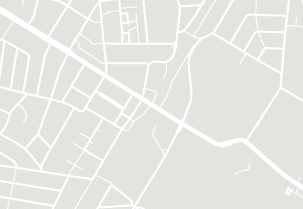
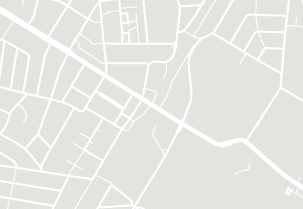

In [11]:
html = gethtml(URL_TO_SCRAPE)
print(html.prettify())

m2_key = "M² pris"